# CS452 Assignment 1: Life Expectancy by Linear Regression

In [1]:
# Author: Göksel Can Önal
# Department: Computer Science
# Degree: BSc.

### Loading the dataset

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Changing default display option to display more columns
pd.options.display.max_columns = 30

In [3]:
# read data
df = pd.read_csv("assignment-1-data.csv")

In [4]:
# shape of data
df.shape

(2938, 22)

In [5]:
#Drops the duplicate rows if exists
df.drop_duplicates(inplace=True)
df.shape

(2938, 22)

In [6]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
# changes object type to category
categorical_columns = ["Country","Status"]

for column in categorical_columns:
    df[column] = df[column].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          2938 non-null   category
 1   Year                             2938 non-null   int64   
 2   Status                           2938 non-null   category
 3   Life expectancy                  2928 non-null   float64 
 4   Adult Mortality                  2928 non-null   float64 
 5   infant deaths                    2938 non-null   int64   
 6   Alcohol                          2744 non-null   float64 
 7   percentage expenditure           2938 non-null   float64 
 8   Hepatitis B                      2385 non-null   float64 
 9   Measles                          2938 non-null   int64   
 10   BMI                             2904 non-null   float64 
 11  under-five deaths                2938 non-null   int64   
 12  Polio 

In [8]:
# data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [9]:
# shows 10 row
df.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1547,Luxembourg,2006,Developed,79.4,85.0,0,11.98,15345.490700,95.0,8,57.5,0,99.0,7.75,99.0,0.1,89739.711700,472637.0,0.9,0.9,0.880,13.5
2701,Turkmenistan,2011,Developing,65.6,217.0,7,2.55,490.418133,97.0,0,45.0,8,97.0,1.98,97.0,0.1,5649.978486,517461.0,3.2,3.3,0.665,10.6
572,China,2003,Developing,73.1,13.0,391,2.96,122.936535,75.0,71879,22.6,467,87.0,4.82,86.0,0.1,1288.642924,12884.0,5.3,4.7,0.610,9.9
1926,Oman,2015,Developing,76.6,99.0,1,NaN,0.000000,99.0,0,54.6,1,99.0,NaN,99.0,0.1,16627.364330,NaN,7.1,6.9,0.795,13.7
1300,Jamaica,2013,Developing,75.6,136.0,1,3.79,5.457289,93.0,0,52.7,1,86.0,5.91,93.0,0.6,56.144952,285187.0,1.8,1.7,0.727,12.8
2637,Tonga,2011,Developing,72.9,14.0,0,0.96,7.033981,82.0,0,73.3,0,84.0,4.60,82.0,0.1,445.188660,14577.0,0.1,0.1,0.712,14.4
236,Belarus,2003,Developing,67.7,253.0,1,11.17,23.835786,56.0,21,55.8,1,53.0,6.59,5.0,0.1,1819.525644,9796749.0,2.5,2.6,0.695,13.9
2174,Saint Lucia,2009,Developing,74.3,147.0,0,11.09,0.000000,95.0,0,43.0,0,95.0,8.12,95.0,0.1,NaN,NaN,4.3,4.4,0.717,12.7
1657,Mauritania,2009,Developing,61.7,215.0,8,0.01,11.145043,64.0,322,26.8,12,63.0,3.79,64.0,1.2,146.838510,356288.0,8.9,8.7,0.476,7.1
1434,Lao People's Democratic Republic,2007,Developing,62.1,234.0,11,5.00,0.000000,5.0,1678,16.1,15,46.0,4.14,5.0,0.2,NaN,NaN,9.7,9.8,0.509,9.0


### Categorical Features

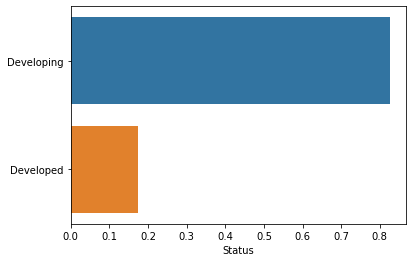

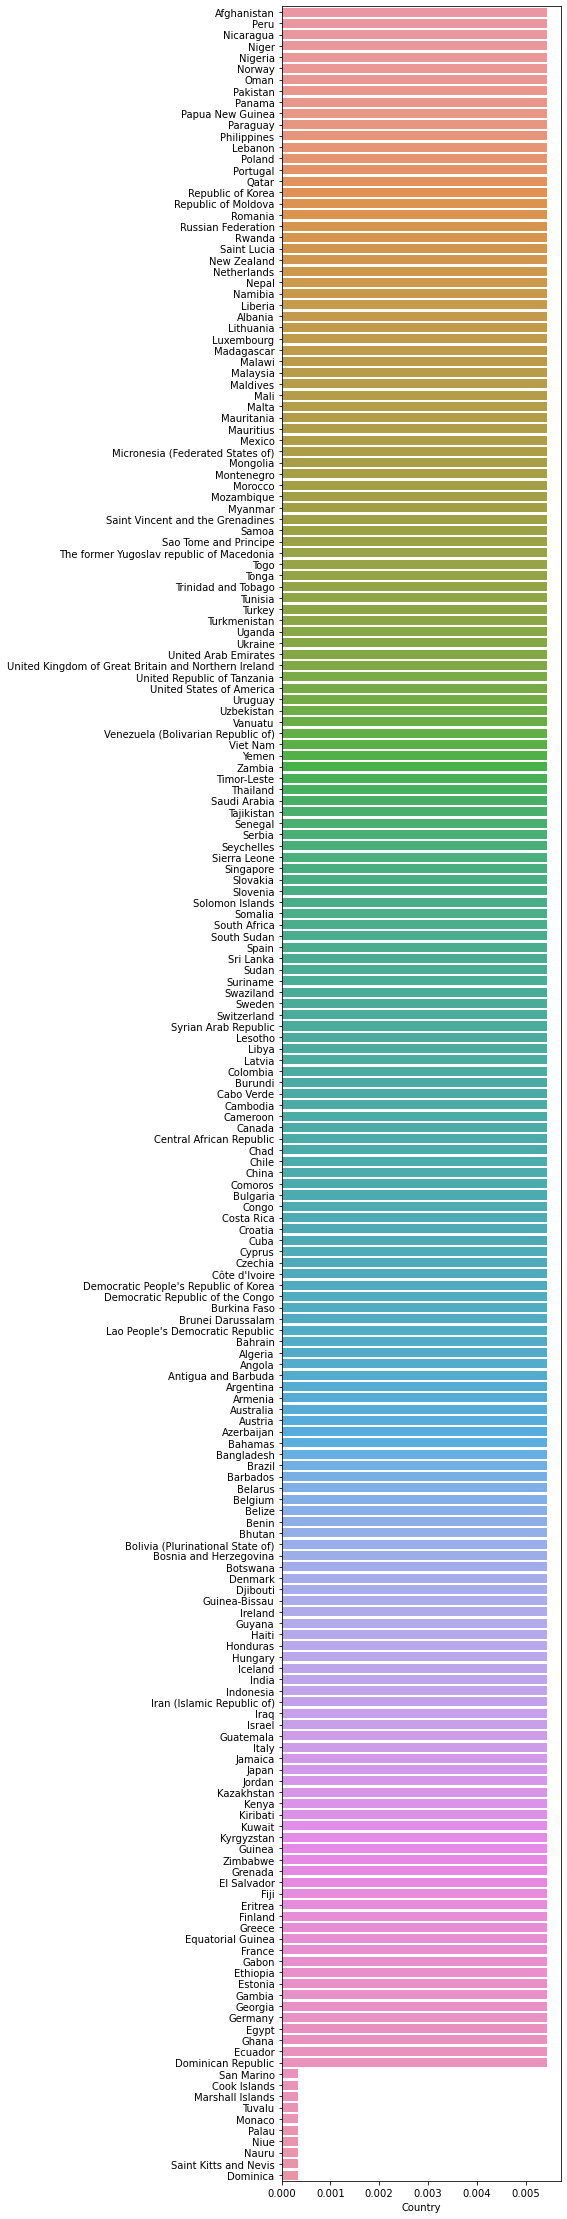

In [10]:
#Bar plots of categorical features
value_percentages = df["Status"].value_counts(normalize=True, sort=True)
sns.barplot(x=value_percentages, y=[value_percentages.index], orient='h', order=value_percentages.index)
plt.savefig("cat_status.png")
plt.show()

plt.figure(figsize=(5,40))
value_percentages = df["Country"].value_counts(normalize=True, sort=True)
sns.barplot(x=value_percentages, y=[value_percentages.index], orient='h', order=value_percentages.index)
plt.savefig("cat_country.png")
plt.show()

In [11]:
# developed countries
np.array(list(set(df[df["Status"] == "Developed"]["Country"]))).reshape((-1))

array(['Iceland', 'Luxembourg', 'Sweden', 'Romania', 'Poland', 'Norway',
       'New Zealand', 'Singapore', 'Switzerland', 'Netherlands',
       'Lithuania', 'Cyprus', 'Croatia', 'Spain', 'Austria', 'Latvia',
       'Denmark', 'Germany', 'Japan', 'Ireland', 'Bulgaria',
       'United Kingdom of Great Britain and Northern Ireland', 'Belgium',
       'Slovenia', 'Australia', 'Malta', 'United States of America',
       'Portugal', 'Hungary', 'Italy', 'Slovakia', 'Czechia'],
      dtype='<U52')

In [12]:
# developed countries have higher life expectancy than developing countries
print("Average Life Expectancy of developed countries :",df[df["Status"] == "Developed"]["Life expectancy "].sum() / len(df[df["Status"] == "Developed"]["Life expectancy "]))
print("Average Life Expectancy of developing countries:",df[df["Status"] == "Developing"]["Life expectancy "].sum() / len(df[df["Status"] == "Developing"]["Life expectancy "]))

Average Life Expectancy of developed countries : 79.1978515625
Average Life Expectancy of developing countries: 66.8348309975268


### Numerical Features

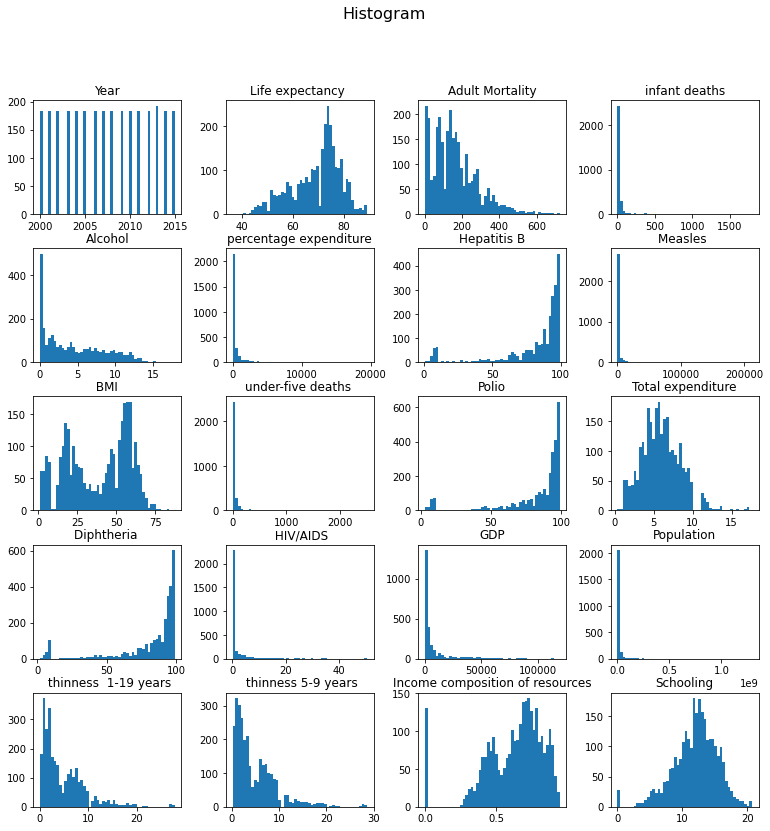

In [13]:
# draws histograms
df.hist(bins=50,figsize=(13,13), grid=False)
plt.suptitle("Histogram", fontsize=16)
plt.savefig("hist_grid.png")
plt.show()

In [14]:
# numerical features
numerical_columns = set(df.columns) - set(categorical_columns)
numerical_columns

{' BMI ',
 ' HIV/AIDS',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Adult Mortality',
 'Alcohol',
 'Diphtheria ',
 'GDP',
 'Hepatitis B',
 'Income composition of resources',
 'Life expectancy ',
 'Measles ',
 'Polio',
 'Population',
 'Schooling',
 'Total expenditure',
 'Year',
 'infant deaths',
 'percentage expenditure',
 'under-five deaths '}

In [15]:
# Summary of numeric features
df.describe().round(1)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.0,2928.0,2928.0,2938.0,2744.0,2938.0,2385.0,2938.0,2904.0,2938.0,2919.0,2712.0,2919.0,2938.0,2490.0,2.286000e+03,2904.0,2904.0,2771.0,2775.0
mean,2007.5,69.2,164.8,30.3,4.6,738.3,80.9,2419.6,38.3,42.0,82.6,5.9,82.3,1.7,7483.2,1.275338e+07,4.8,4.9,0.6,12.0
std,4.6,9.5,124.3,117.9,4.1,1987.9,25.1,11467.3,20.0,160.4,23.4,2.5,23.7,5.1,14270.2,6.101210e+07,4.4,4.5,0.2,3.4
min,2000.0,36.3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.4,2.0,0.1,1.7,3.400000e+01,0.1,0.1,0.0,0.0
25%,2004.0,63.1,74.0,0.0,0.9,4.7,77.0,0.0,19.3,0.0,78.0,4.3,78.0,0.1,463.9,1.957932e+05,1.6,1.5,0.5,10.1
50%,2008.0,72.1,144.0,3.0,3.8,64.9,92.0,17.0,43.5,4.0,93.0,5.8,93.0,0.1,1766.9,1.386542e+06,3.3,3.3,0.7,12.3
75%,2012.0,75.7,228.0,22.0,7.7,441.5,97.0,360.2,56.2,28.0,97.0,7.5,97.0,0.8,5910.8,7.420359e+06,7.2,7.2,0.8,14.3
max,2015.0,89.0,723.0,1800.0,17.9,19479.9,99.0,212183.0,87.3,2500.0,99.0,17.6,99.0,50.6,119172.7,1.293859e+09,27.7,28.6,0.9,20.7


## Data Preprocessing

In [16]:
#Copy the original dataframe before changing operations
clean_df = df.copy()

In [17]:
# columns of data
clean_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [18]:
# cleans column names
clean_df.rename(columns={"Life expectancy ":"Life_Expectancy",
                         "Adult Mortality":"Adult_Mortality",
                         "infant deaths":"Infant_Deaths",
                         "percentage expenditure":"Percentage_Expenditure",
                         "Hepatitis B": "Hepatitis_B", 
                         "Measles ":"Measles",
                         " BMI ":"BMI",
                         "under-five deaths ":"Under-five_Deaths",
                         "Total expenditure":"Total_expenditure",
                         " HIV/AIDS":"HIV/AIDS",
                         "Diphtheria ":"Diphtheria",
                         " thinness  1-19 years":"Thinness_1-19years",
                         " thinness 5-9 years":"Thinness_5-9years",
                         "Income composition of resources":"Income_composition_of_resources"}, 
                         inplace= True)

In [19]:
# column names
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [20]:
# replacing unkown values with NaN
clean_df.Status.replace(to_replace ='unknown', value=np.nan, inplace=True)
clean_df.Country.replace(to_replace ='unknown', value=np.nan, inplace=True)

In [21]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          2938 non-null   category
 1   Year                             2938 non-null   int64   
 2   Status                           2938 non-null   category
 3   Life_Expectancy                  2928 non-null   float64 
 4   Adult_Mortality                  2928 non-null   float64 
 5   Infant_Deaths                    2938 non-null   int64   
 6   Alcohol                          2744 non-null   float64 
 7   Percentage_Expenditure           2938 non-null   float64 
 8   Hepatitis_B                      2385 non-null   float64 
 9   Measles                          2938 non-null   int64   
 10  BMI                              2904 non-null   float64 
 11  Under-five_Deaths                2938 non-null   int64   
 12  Polio 

In [22]:
clean_df.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under-five_Deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19years,Thinness_5-9years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [23]:
# number of different statuses
clean_df["Status"].unique().shape[0]

2

In [24]:
# values of Status
clean_df.Status.unique()

['Developing', 'Developed']
Categories (2, object): ['Developing', 'Developed']

In [25]:
# encoding status
encoded_status =pd.get_dummies(clean_df["Status"])
clean_df.drop(["Status"], axis=1, inplace=True)
clean_df = pd.concat([clean_df, encoded_status], axis=1)

In [26]:
# number of different countries
clean_df["Country"].unique().shape[0]

193

In [27]:
# encoding country
# encoded_country =pd.get_dummies(clean_df["Country"])
#clean_df.drop(["Country"], axis=1, inplace=True)
#clean_df = pd.concat([clean_df, encoded_country], axis=1)

### Handling with Missing Values

In [28]:
# number of nan values
clean_df.isna().sum().sort_values(ascending=False)

Population                         652
Hepatitis_B                        553
GDP                                448
Total_expenditure                  226
Alcohol                            194
Income_composition_of_resources    167
Schooling                          163
BMI                                 34
Thinness_5-9years                   34
Thinness_1-19years                  34
Polio                               19
Diphtheria                          19
Life_Expectancy                     10
Adult_Mortality                     10
Developed                            0
Country                              0
HIV/AIDS                             0
Year                                 0
Under-five_Deaths                    0
Measles                              0
Percentage_Expenditure               0
Infant_Deaths                        0
Developing                           0
dtype: int64

In [29]:
#Some instances may have null values at the same time.
rows_with_multiple_nan_values = clean_df[(clean_df.Population.isna()) & (clean_df.Hepatitis_B.isna()) & (clean_df.GDP.isna())]
rows_with_multiple_nan_values

,Country,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under-five_Deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19years,Thinness_5-9years,Income_composition_of_resources,Schooling,Developed,Developing
175,Bahamas,2000,72.6,192.0,0,12.15,0.0,NaN,0,54.4,0,91.0,5.21,99.0,0.1,NaN,NaN,2.7,2.6,0.000,12.0,0,1
447,Côte d'Ivoire,2000,47.9,461.0,67,3.45,0.0,NaN,5729,19.4,95,66.0,6.00,65.0,7.1,NaN,NaN,8.1,8.1,NaN,NaN,0,1
617,Congo,2006,56.9,368.0,8,2.25,0.0,NaN,126,22.3,12,73.0,2.37,73.0,5.5,NaN,NaN,8.7,8.3,0.507,9.6,0,1
618,Congo,2005,55.3,394.0,8,2.03,0.0,NaN,146,21.7,13,62.0,2.42,62.0,5.9,NaN,NaN,8.8,8.5,0.496,9.4,0,1
619,Congo,2004,54.1,48.0,9,2.58,0.0,NaN,3524,21.2,13,67.0,2.56,67.0,6.3,NaN,NaN,9.0,8.6,0.497,9.2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,United Republic of Tanzania,2001,49.6,46.0,110,4.09,0.0,NaN,11847,16.4,173,65.0,3.28,87.0,12.5,NaN,NaN,8.2,8.1,NaN,NaN,0,1
2793,United Republic of Tanzania,2000,49.2,457.0,114,3.89,0.0,NaN,14649,16.0,181,64.0,2.64,79.0,12.8,NaN,NaN,8.3,8.3,NaN,NaN,0,1
2887,Viet Nam,2002,73.8,137.0,30,2.03,0.0,NaN,6755,1.0,39,92.0,4.70,75.0,0.2,NaN,NaN,15.6,16.3,0.584,10.7,0,1
2888,Viet Nam,2001,73.6,138.0,32,1.84,0.0,NaN,12058,9.6,41,96.0,5.17,96.0,0.1,NaN,NaN,15.7,16.4,0.576,10.6,0,1


In [30]:
#Dropping the rows with multiple NaN values
clean_df = clean_df.drop(rows_with_multiple_nan_values.index, axis=0)
reduction_rate = round(1 - clean_df.shape[0]/df.shape[0], 4)
print("Dataset is reduced by", reduction_rate, '% after dropping.')

Dataset is reduced by 0.0231 % after dropping.


In [31]:
# number of nan values
clean_df.isna().sum().sort_values(ascending=False)

Population                         584
Hepatitis_B                        485
GDP                                380
Total_expenditure                  209
Alcohol                            194
Income_composition_of_resources    123
Schooling                          119
BMI                                 34
Thinness_5-9years                   34
Thinness_1-19years                  34
Polio                               19
Diphtheria                          19
Life_Expectancy                     10
Adult_Mortality                     10
Developed                            0
Country                              0
HIV/AIDS                             0
Year                                 0
Under-five_Deaths                    0
Measles                              0
Percentage_Expenditure               0
Infant_Deaths                        0
Developing                           0
dtype: int64

In [32]:
# takes column names which have more than 350 null values 
nans = list(clean_df.columns[clean_df.isnull().sum() > 350])

In [33]:
clean_df[nans].describe().T

,count,mean,std,min,25%,50%,75%,max
Hepatitis_B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
GDP,2490.0,7.483158e+03,1.427017e+04,1.68135,463.935626,1.766948e+03,5.910806e+03,1.191727e+05
Population,2286.0,1.275338e+07,6.101210e+07,34.00000,195793.250000,1.386542e+06,7.420359e+06,1.293859e+09


In [34]:
means = clean_df[nans].mean().round(1)
means

Hepatitis_B          80.9
GDP                7483.2
Population     12753375.1
dtype: float64

In [35]:
clean_df[nans] = clean_df[nans].fillna(means)

In [36]:
# number of nan values
clean_df.isna().sum().sort_values(ascending=False)

Total_expenditure                  209
Alcohol                            194
Income_composition_of_resources    123
Schooling                          119
Thinness_5-9years                   34
BMI                                 34
Thinness_1-19years                  34
Polio                               19
Diphtheria                          19
Life_Expectancy                     10
Adult_Mortality                     10
GDP                                  0
Developed                            0
Population                           0
Country                              0
HIV/AIDS                             0
Year                                 0
Under-five_Deaths                    0
Measles                              0
Hepatitis_B                          0
Percentage_Expenditure               0
Infant_Deaths                        0
Developing                           0
dtype: int64

In [37]:
# drops null values
clean_df.dropna(inplace=True)

In [38]:
# number of null values
clean_df.isnull().sum()

Country                            0
Year                               0
Life_Expectancy                    0
Adult_Mortality                    0
Infant_Deaths                      0
Alcohol                            0
Percentage_Expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
Under-five_Deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness_1-19years                 0
Thinness_5-9years                  0
Income_composition_of_resources    0
Schooling                          0
Developed                          0
Developing                         0
dtype: int64

### Observing Correlations

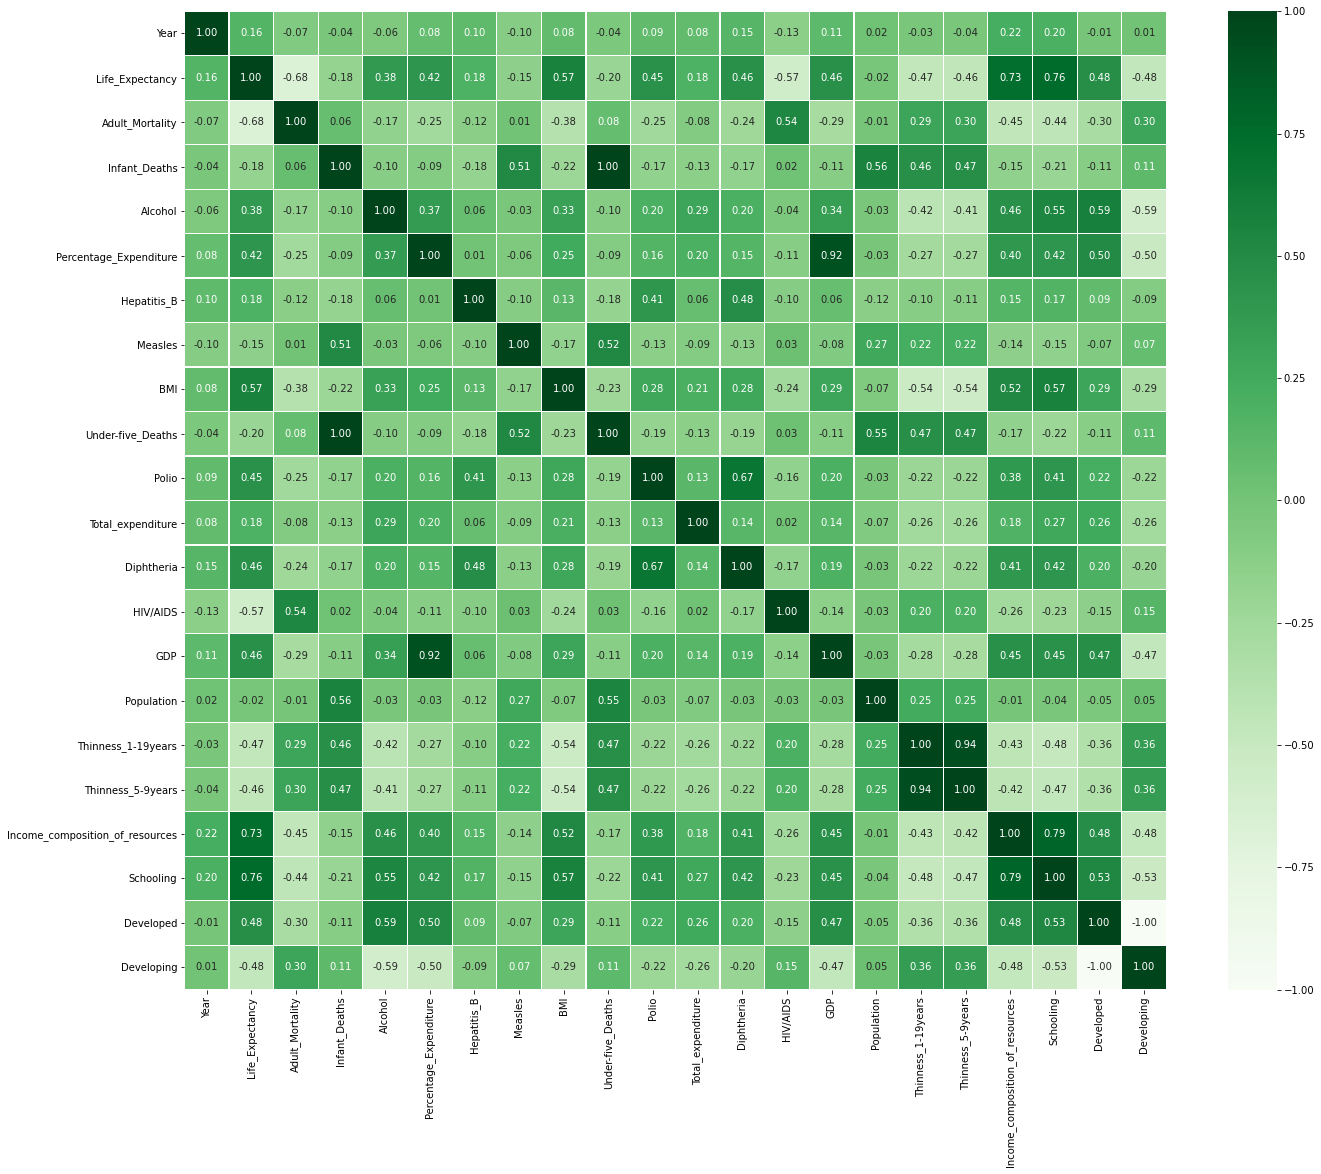

In [39]:
# draws correlation map
plt.figure(figsize=(22,18))
cm = clean_df.corr()
sns.heatmap(cm, cbar=True, annot=True, linewidths= .2, fmt=".2f", cmap="Greens")
plt.savefig("heatmap.png")
plt.show()

In [40]:
cm["Life_Expectancy"].sort_values()

Adult_Mortality                   -0.676949
HIV/AIDS                          -0.571130
Developing                        -0.475906
Thinness_1-19years                -0.465864
Thinness_5-9years                 -0.460829
Under-five_Deaths                 -0.204956
Infant_Deaths                     -0.179856
Measles                           -0.147762
Population                        -0.021386
Year                               0.163567
Hepatitis_B                        0.182706
Total_expenditure                  0.184725
Alcohol                            0.381809
Percentage_Expenditure             0.415616
Polio                              0.447969
GDP                                0.455215
Diphtheria                         0.458104
Developed                          0.475906
BMI                                0.567069
Income_composition_of_resources    0.733314
Schooling                          0.757800
Life_Expectancy                    1.000000
Name: Life_Expectancy, dtype: fl

In [41]:
# most correlated columns with life expectancy
most_corr_cols_with_life = list(cm[(cm["Life_Expectancy"] > 0.2) | (cm["Life_Expectancy"] < -0.2)].index)
most_corr_cols_with_life.remove("Life_Expectancy")
most_corr_cols_with_life

['Adult_Mortality',
 'Alcohol',
 'Percentage_Expenditure',
 'BMI',
 'Under-five_Deaths',
 'Polio',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Thinness_1-19years',
 'Thinness_5-9years',
 'Income_composition_of_resources',
 'Schooling',
 'Developed',
 'Developing']

In [42]:
# health related columns with life expectancy more than 0.45 corr
high_health_corr_w_life = ["Adult_Mortality", "HIV/AIDS",                        
                           "Thinness_1-19years", "Thinness_5-9years", 
                           "Polio", "Diphtheria", "BMI"]

In [43]:
# why Diphtheria or Polio has positive correlation with life expectancy contary to HIV/AIDS??? 
# let's see data how these deadly diseases have positive effect on life expectancy

In [44]:
# number of countries with diphtheria above the average 
len_diph_more_avg = len(set(clean_df[clean_df["Diphtheria"] > clean_df["Diphtheria"].mean()]["Country"]))
len_diph_more_avg

150

In [45]:
# number of countries
len_cont = len(set(clean_df["Country"]))
len_cont

171

In [46]:
# 0.88 of the countries have Diphtheria more than average
rate = len_diph_more_avg / len_cont
rate

0.8771929824561403

In [47]:
# number of developed countries 
len_dev_cont = len(set(clean_df[clean_df["Developed"] == 1]["Country"]))
len_dev_cont

29

In [48]:
# number of developed countries with diphtheria above the average
len_dev_diph = len(set(clean_df[(clean_df["Developed"] == 1) & (clean_df["Diphtheria"] > clean_df["Diphtheria"].mean())]["Country"].unique()))
len_dev_diph

29

In [49]:
# all developed countries have Diphtheria more than average
len_dev_diph / len_dev_cont

1.0

In [50]:
# number of countries with Polio above the average 
len_polio_more_avg = len(set(clean_df[clean_df["Polio"] > clean_df["Polio"].mean()]["Country"]))
len_polio_more_avg

150

In [51]:
# 0.88 of the countries have Polio more than average
rate = len_polio_more_avg / len_cont
rate

0.8771929824561403

In [52]:
# number of developed countries with Polio above the average
len_dev_polio = len(set(clean_df[(clean_df["Developed"] == 1) & (clean_df["Polio"] > clean_df["Polio"].mean())]["Country"].unique()))
len_dev_polio

29

In [53]:
# all developed countries have Polio more than average
len_dev_polio / len_dev_polio

1.0

In [54]:
# Since these deadly diseases are very common and also all developed contries have these diseases more than average
# correlation with life expectancy is not negative, as it can be seen other factors can affect relations
# average life expectancy is higher in the developed countries is demonstrated in the first part

In [55]:
# takes all dependents
dependents = list(cm["Life_Expectancy"].index)
dependents

['Year',
 'Life_Expectancy',
 'Adult_Mortality',
 'Infant_Deaths',
 'Alcohol',
 'Percentage_Expenditure',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'Under-five_Deaths',
 'Polio',
 'Total_expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'Thinness_1-19years',
 'Thinness_5-9years',
 'Income_composition_of_resources',
 'Schooling',
 'Developed',
 'Developing']

### Visualization

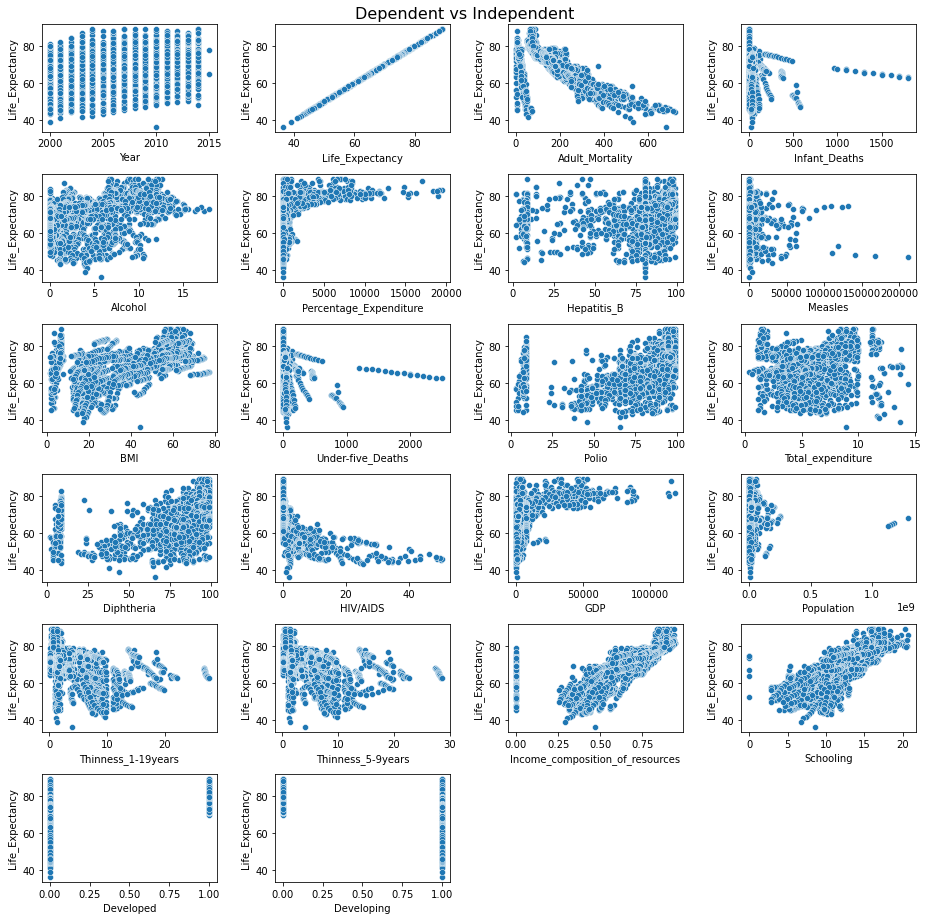

In [56]:
# dependent vs independent
k = 1;
plt.figure(figsize=(13,13))
for i in dependents:
    plt.subplot(6, 4, k)
    sns.scatterplot(data = clean_df, x= i, y= "Life_Expectancy")
    k += 1

plt.suptitle("Dependent vs Independent", fontsize=16)
plt.savefig("dependentVındependent.png")
plt.tight_layout()
plt.show()

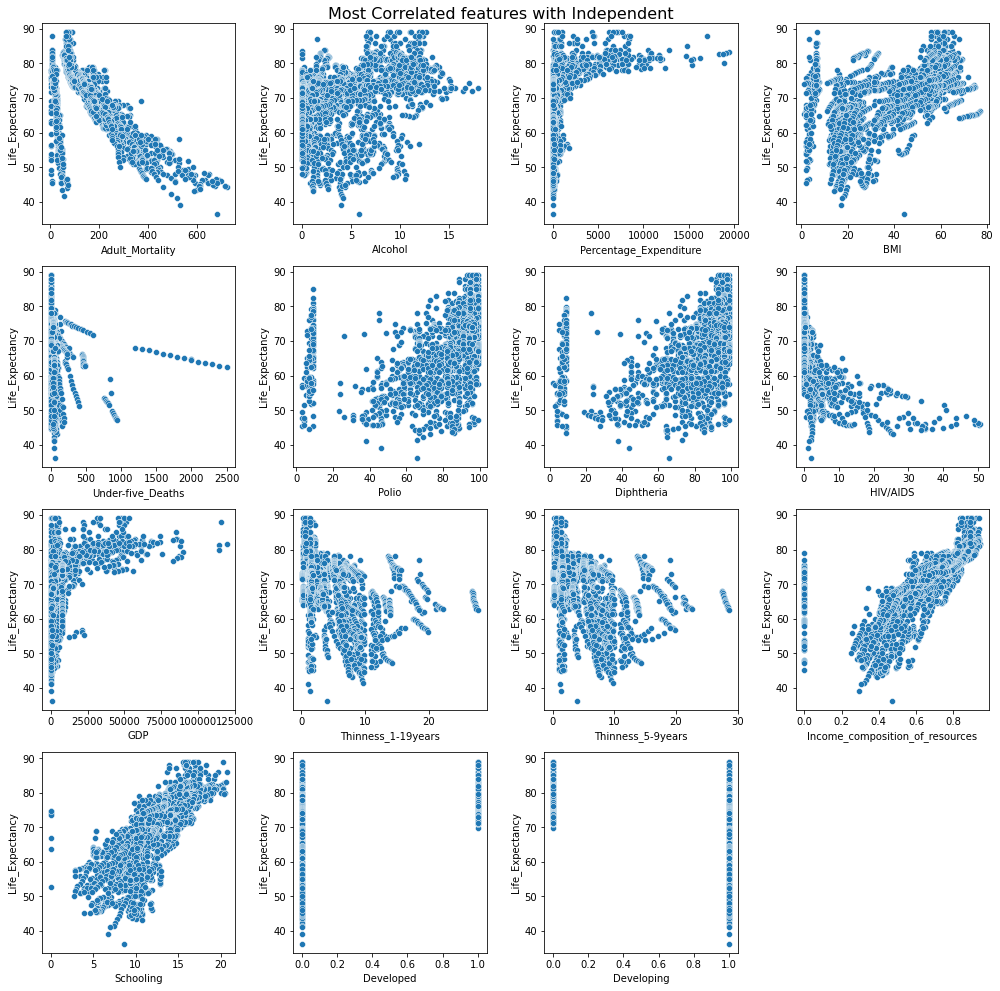

In [57]:
# most correlated vs independent
k = 1;
plt.figure(figsize=(14,14))
for i in most_corr_cols_with_life:
    plt.subplot(4, 4, k)
    sns.scatterplot(data = clean_df, x= i, y= "Life_Expectancy")
    k += 1
plt.suptitle("Most Correlated features with Independent", fontsize=16)
plt.savefig("mostcorrVındependent.png")
plt.tight_layout()

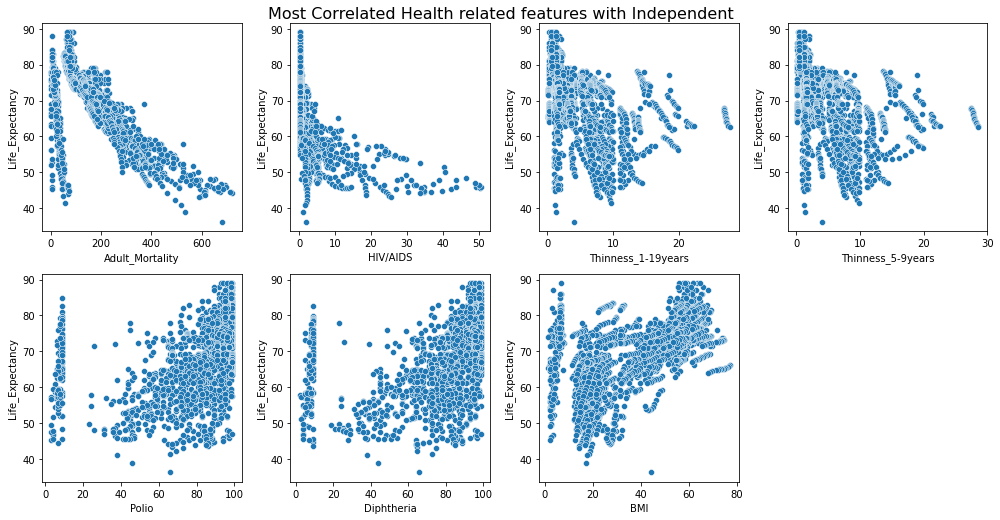

In [58]:
# most correlated health vs independent
k = 1;
plt.figure(figsize=(14,14))
for i in high_health_corr_w_life:
    plt.subplot(4, 4, k)
    sns.scatterplot(data = clean_df, x= i, y= "Life_Expectancy")
    k += 1
plt.suptitle("Most Correlated Health related features with Independent", fontsize=16)
plt.savefig("healthVındependent.png")
plt.tight_layout()

## Building Model

In [59]:
# imports sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [60]:
# spliting, standardization, fitting, predicting according to train data and prints evaluation metrics
def build_model(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=147)
    
    scaler = MinMaxScaler(feature_range=(0,1))
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    lin_model = LinearRegression()
    lin_model.fit(X_train, y_train)
    y_pred = lin_model.predict(X_train)
    
    MSE = mean_squared_error(y_train,y_pred)
    MAE = mean_absolute_error(y_train,y_pred)
    RMSE = np.sqrt(mean_squared_error(y_train,y_pred))
    R2 = r2_score(y_train,y_pred)
    print("MSE : ", MSE)
    print("MAE : ", MAE)
    print("RMSE: ", RMSE)
    print("R2  : ", R2)
    print("coef: " ,lin_model.coef_)
    print("intercept: ", lin_model.intercept_)
    print()
    return (MSE, MAE, RMSE, R2, lin_model.coef_, lin_model.intercept_)

In [61]:
# prepares data
X = clean_df.drop(["Country","Life_Expectancy"], axis=1)
y = clean_df["Life_Expectancy"]

In [62]:
# make sure there is no null values
X.isnull().sum()

Year                               0
Adult_Mortality                    0
Infant_Deaths                      0
Alcohol                            0
Percentage_Expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
Under-five_Deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness_1-19years                 0
Thinness_5-9years                  0
Income_composition_of_resources    0
Schooling                          0
Developed                          0
Developing                         0
dtype: int64

In [63]:
# number of columns
X.shape[1]

21

In [64]:
# column names
X.columns

Index(['Year', 'Adult_Mortality', 'Infant_Deaths', 'Alcohol',
       'Percentage_Expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'Under-five_Deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness_1-19years',
       'Thinness_5-9years', 'Income_composition_of_resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

### Feature Selection

In [65]:
# randomly selects columns 
np.random.seed(147)
def random_col_select():
    random_var = np.random.randint(8, X.shape[1] + 1)
    list = []
    for col_name in X.columns:
        list.append(col_name)
    
    random_cols = np.random.choice(list, random_var, replace=False)
    
    # provides developing and developed encoded columns are together 
    if ("Developed" in random_cols) and ("Developing" not in random_cols):
        random_cols = np.append(random_cols,"Developing")
    if ("Developing" in random_cols) and ("Developed" not in random_cols):
        random_cols = np.append(random_cols,"Developed")
    return random_cols

In [66]:
# prepares different sets
np.random.seed(147)

# models without country column
X1_cols = np.array(random_col_select())
X2_cols = np.array(random_col_select())
X3_cols = np.array(random_col_select())
X4_cols = np.array(random_col_select())
X5_cols = np.array(random_col_select())


X1 = X[X1_cols]
X2 = X[X2_cols]
X3 = X[X3_cols]
X4 = X[X4_cols]
X5 = X[X5_cols]
#XX = X[most_corr_cols_with_life] # special
models = [X1,X2,X3,X4,X5]

# models with country column
encoded_country =pd.get_dummies(clean_df["Country"])

X1_w_country = pd.concat([X[X1_cols], encoded_country] ,axis=1)
X2_w_country = pd.concat([X[X2_cols], encoded_country] ,axis=1)
X3_w_country = pd.concat([X[X3_cols], encoded_country] ,axis=1)
X4_w_country = pd.concat([X[X4_cols], encoded_country] ,axis=1)
X5_w_country = pd.concat([X[X5_cols], encoded_country] ,axis=1)
#XX_w_country = pd.concat([X[most_corr_cols_with_life], encoded_country] ,axis=1)
models_c = [X1_w_country, X2_w_country, X3_w_country, X4_w_country, X5_w_country]

### Visualizing Evaluation Metrics

In [67]:
# runs all models
list_mse = []
list_mae = []
list_rmse = []
list_r2 = []
list_coef = []
list_intercept = []

for k,i in enumerate(models):
    print(f"Model {k+1}")
    mse, mae, rmse, r2, coef, intercept = build_model(i,y)
    print("-"*40)
    list_mse.append(mse)
    list_mae.append(mae) 
    list_rmse.append(rmse) 
    list_r2.append(r2) 
    list_coef.append(coef) 
    list_intercept.append(intercept)

Model 1
MSE :  17.506988832442218
MAE :  3.10700972213024
RMSE:  4.184135374535845
R2  :  0.8023561047701434
coef:  [-12.90055973   6.85595498 -26.13830489   3.44099132  -8.79808375
   1.06100876   1.0838413   -0.86601961  -0.70403808   0.76538469
  27.11414143  -0.76538469  -2.58823434   0.84340605]
intercept:  55.78171060382168

----------------------------------------
Model 2
MSE :  28.992994310219736
MAE :  3.949459080729117
RMSE:  5.384514305879383
R2  :  0.6726856694379051
coef:  [ 3.19136327 -1.84435308 -3.70837107 -1.1795858  -1.655252   -1.31624686
  4.40093234  6.2639965   5.18611294 -1.21144995 -0.69756535 -4.53533806
 10.87671799 21.50925569  1.655252  ]
intercept:  45.91834313503165

----------------------------------------
Model 3
MSE :  16.723167674917928
MAE :  3.1013590982903434
RMSE:  4.0893969818199265
R2  :  0.8112049975305933
coef:  [ 2.43867102e+00 -1.43368533e+00 -1.47242390e+00  1.96458987e+01
 -3.26528073e+01  3.01264663e+00  3.42583321e+00 -1.45535399e+00
  4.

In [68]:
# creates dataframe for metrics
models = ["Model-1", "Model-2", "Model-3", "Model-4", "Model-5"]
df_metric = pd.DataFrame({"Models": models,
                          "MSE": list_mse,
                          "MAE": list_mae,
                          "RMSE": list_rmse,
                          "R2": list_r2,
                          "Intercept": list_intercept,
                          "Coefs": list_coef
                         })
df_metric.set_index("Models", inplace=True)

df_metric

,MSE,MAE,RMSE,R2,Intercept,Coefs
Models,,,,,,
Model-1,17.506989,3.107010,4.184135,0.802356,55.781711,"[-12.900559734332415, 6.855954977993016, -26.1..."
Model-2,28.992994,3.949459,5.384514,0.672686,45.918343,"[3.1913632678251735, -1.8443530837345241, -3.7..."
Model-3,16.723168,3.101359,4.089397,0.811205,50.031649,"[2.438671021950461, -1.4336853267758323, -1.47..."
Model-4,44.457924,5.231358,6.667678,0.498095,66.555611,"[4.049639462059353, -4.049639462059233, -1.121..."
Model-5,14.883535,2.879063,3.857919,0.831973,54.732195,"[173.96030600303598, 17.392733736368456, -180...."


In [69]:
# information of best model
def print_best_model(data):
    print("Best Model in terms of mse :", data[data["MSE"] == data["MSE"].min()].index[0])
    print("Best Model in terms of mae :", data[data["MAE"] == data["MAE"].min()].index[0])
    print("Best Model in terms of rmse:", data[data["RMSE"] == data["RMSE"].min()].index[0])
    print("Best Model in terms of r^2 :", data[data["R2"] == data["R2"].max()].index[0])    
    print("Coefficients of best model:", data[data.index == data[data["R2"] == data["R2"].max()].index[0]]["Coefs"][0])
    print("Intercept of best model   :", data[data.index == data[data["R2"] == data["R2"].max()].index[0]]["Intercept"][0])

In [70]:
# bar plot of metrics
def plot_metrics(data):
    plt.figure(figsize=(13,3))
    plt.subplot(1,4,1)
    plt.title("MSE")
    plt.bar(data.index, data["MSE"])
    plt.xticks(rotation=45)
    
    plt.subplot(1,4,2)
    plt.title("MAE")
    plt.bar(data.index, data["MAE"])
    plt.xticks(rotation=45)
    
    plt.subplot(1,4,3)
    plt.title("RMSE")
    plt.bar(data.index, data["RMSE"])
    plt.xticks(rotation=45)
    
    plt.subplot(1,4,4)
    plt.title("R2")
    plt.bar(data.index, data["R2"])
    plt.xticks(rotation=45)
    
    plt.suptitle("Metrics", fontsize=16)
    plt.tight_layout()
    plt.savefig("metrics_train.png")
    plt.show()

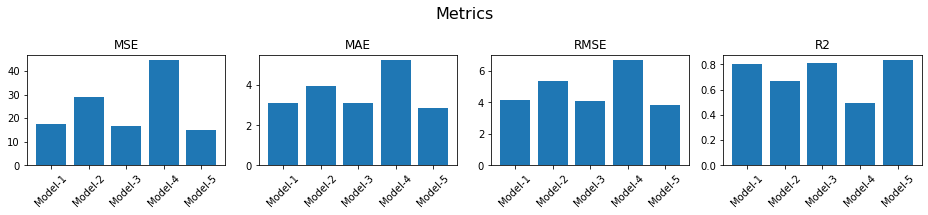

In [71]:
# bar plot of metrics
plot_metrics(df_metric)

In [72]:
# why model5 wins, lets check

In [73]:
# best model
print(X5.columns)
print(X5.shape[1])

Index(['Infant_Deaths', 'Schooling', 'Under-five_Deaths', 'Thinness_5-9years',
       'Measles', 'Income_composition_of_resources', 'Polio',
       'Total_expenditure', 'Developing', 'GDP', 'Adult_Mortality',
       'Thinness_1-19years', 'BMI', 'HIV/AIDS', 'Hepatitis_B', 'Developed'],
      dtype='object')
16


In [74]:
#worst model
print(X4.columns)
print(X4.shape[1])

Index(['Developed', 'Developing', 'Hepatitis_B', 'Thinness_1-19years',
       'Diphtheria', 'Infant_Deaths', 'Under-five_Deaths', 'Measles',
       'Total_expenditure', 'Thinness_5-9years', 'Year'],
      dtype='object')
11


In [75]:
# Life expectancy correlation table
col1 = cm["Life_Expectancy"]
corr_table = pd.DataFrame(col1)
corr_table = corr_table.apply(np.absolute)
corr_table

,Life_Expectancy
Year,0.163567
Life_Expectancy,1.000000
Adult_Mortality,0.676949
Infant_Deaths,0.179856
Alcohol,0.381809
Percentage_Expenditure,0.415616
Hepatitis_B,0.182706
Measles,0.147762
BMI,0.567069
Under-five_Deaths,0.204956


In [76]:
# model-5 has more average correlation with independent feature than model-4
print("Average correlation in model-5:",(corr_table.loc[X5.columns].sum() / X5.shape[1])[0])
print("Average correlation in model-4:",(corr_table.loc[X4.columns].sum() / X4.shape[1])[0])

Average correlation in model-5: 0.43674718339065177
Average correlation in model-4: 0.30910733502946475


In [77]:
# best model info
print_best_model(df_metric)

Best Model in terms of mse : Model-5
Best Model in terms of mae : Model-5
Best Model in terms of rmse: Model-5
Best Model in terms of r^2 : Model-5
Coefficients of best model: [ 173.960306     17.39273374 -180.54666841   -0.26697342   -1.15008438
    6.59749917    3.80562178    0.18825279   -0.72435399    5.6447511
  -11.529357     -1.51863307    2.81615611  -24.88468304   -0.63687373
    0.72435399]
Intercept of best model   : 54.732194764851684


### Test Best Model

In [78]:
best_model = "X5"

In [79]:
# runs Linear Regression algorithm with model-5 to predict test data and see results
X = X5
y = clean_df["Life_Expectancy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=147)

scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lin_model_best = LinearRegression()
lin_model_best.fit(X_train, y_train)
y_pred = lin_model_best.predict(X_test)

MSE_b = mean_squared_error(y_test,y_pred)
MAE_b = mean_absolute_error(y_test,y_pred)
RMSE_b = np.sqrt(mean_squared_error(y_test,y_pred))
R2_b = r2_score(y_test,y_pred)
print("MSE : ", MSE_b)
print("MAE : ", MAE_b)
print("RMSE: ", RMSE_b)
print("R2  : ", R2_b)
print("coef: " ,lin_model_best.coef_)
print("intercept: ", lin_model_best.intercept_)

MSE :  14.335320968031862
MAE :  2.889635864837425
RMSE:  3.7862013903161387
R2  :  0.8339339183297774
coef:  [ 173.960306     17.39273374 -180.54666841   -0.26697342   -1.15008438
    6.59749917    3.80562178    0.18825279   -0.72435399    5.6447511
  -11.529357     -1.51863307    2.81615611  -24.88468304   -0.63687373
    0.72435399]
intercept:  54.732194764851684


R2:  0.8339339183297774


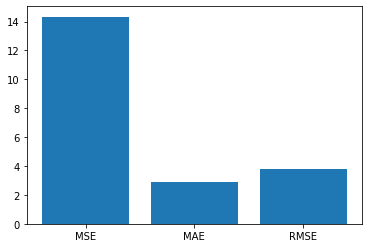

In [80]:
# plots metrics
print("R2: ", R2_b)
metrics_list = [MSE_b, MAE_b, RMSE_b]
metrics_name = ["MSE","MAE","RMSE"]
plt.bar(metrics_name,metrics_list)
plt.savefig("test1_res.png")
plt.show()

In [81]:
# function for best model
_str ="y = "
for i,m in enumerate(lin_model_best.coef_):
    _str += f"{X5.columns[i]} * {m} + "
_str += str(lin_model_best.intercept_)
print(_str)

y = Infant_Deaths * 173.96030600303598 + Schooling * 17.392733736368456 + Under-five_Deaths * -180.54666841001287 + Thinness_5-9years * -0.266973419532781 + Measles * -1.1500843798865301 + Income_composition_of_resources * 6.5974991651178465 + Polio * 3.805621781499566 + Total_expenditure * 0.18825279172354206 + Developing * -0.7243539920288181 + GDP * 5.64475109721214 + Adult_Mortality * -11.529356998801983 + Thinness_1-19years * -1.5186330738663196 + BMI * 2.8161561128775294 + HIV/AIDS * -24.88468304022991 + Hepatitis_B * -0.6368737348156323 + Developed * 0.7243539920299692 + 54.732194764851684


### Evaluate with Countries

In [82]:
# runs all models with additional country column
list_mse_c = []
list_mae_c = []
list_rmse_c = []
list_r2_c = []
list_coef_c = []
list_intercept_c = []

for k,i in enumerate(models_c):
    print(f"Model {k+1}")
    mse, mae, rmse, r2, coef, intercept = build_model(i,y)
    print("-"*40)
    list_mse_c.append(mse)
    list_mae_c.append(mae) 
    list_rmse_c.append(rmse) 
    list_r2_c.append(r2) 
    list_coef_c.append(coef) 
    list_intercept_c.append(intercept)

Model 1
MSE :  3.2796989342206793
MAE :  1.1194922839506174
RMSE:  1.8109939078364343
R2  :  0.9629740740258325
coef:  [-1.44165901e+00 -1.89073267e-01 -1.52400212e+01 -5.11530732e-02
 -3.90263702e+00 -1.63843457e-02 -1.23500800e-01 -1.78128075e+00
  3.90230461e+00  1.33599810e+14  3.38399191e+00  1.24654485e+14
  7.11994789e-01 -6.30240074e+00  7.55497477e+11  7.55497477e+11
  7.55497477e+11  7.55497477e+11  7.55497477e+11  7.55497477e+11
  7.55497477e+11 -8.18982729e+12 -8.18982729e+12  7.55497477e+11
  7.55497477e+11  7.55497477e+11  7.55497477e+11  7.55497477e+11
  7.55497477e+11 -8.18982729e+12  7.55497477e+11  7.55497477e+11
  7.55497477e+11  7.55497477e+11  7.55497477e+11  7.55497477e+11
  7.55497477e+11  7.55497477e+11 -8.18982729e+12  7.55497477e+11
  7.55497477e+11  7.55497477e+11  7.55497477e+11  7.55497477e+11
  7.55497477e+11  7.55497477e+11  7.55497477e+11  7.55497477e+11
  7.55497477e+11  7.55497477e+11  7.55497477e+11  7.55497477e+11
  2.76623441e+13  7.55497477e+11 -8.

RMSE:  1.9348907411234773
R2  :  0.9577346137063322
coef:  [-5.48579830e+11  2.80083614e+13 -1.83471680e-01  2.72254944e-01
  9.09107208e-01  1.70484230e+02 -1.73190369e+02 -1.63263702e+00
 -5.74745178e-01 -5.47119141e-01  4.94970703e+00  6.97159843e+11
  6.97159843e+11  6.97159843e+11  6.97159843e+11  6.97159843e+11
  6.97159843e+11  6.97159843e+11  2.92541010e+13  2.92541010e+13
  6.97159843e+11  6.97159843e+11  6.97159843e+11  6.97159843e+11
  6.97159843e+11  6.97159843e+11  2.92541010e+13  6.97159843e+11
  6.97159843e+11  6.97159843e+11  6.97159843e+11  6.97159843e+11
  6.97159843e+11  6.97159843e+11  6.97159843e+11  2.92541010e+13
  6.97159843e+11  6.97159843e+11  6.97159843e+11  6.97159843e+11
  6.97159843e+11  6.97159843e+11  6.97159843e+11  6.97159843e+11
  6.97159843e+11  6.97159843e+11  6.97159843e+11  6.97159843e+11
  6.97159843e+11 -5.21796919e+12  6.97159843e+11  2.92541010e+13
  6.97159843e+11  2.92541010e+13  7.24559796e+11 -2.25536346e+12
 -5.89697877e+12 -2.10961976e+1

In [83]:
# creates dataframe for metrics
models = ["Model-1", "Model-2", "Model-3", "Model-4", "Model-5"]
df_metric_c = pd.DataFrame({"Models": models,
                          "MSE": list_mse_c,
                          "MAE": list_mae_c,
                          "RMSE": list_rmse_c,
                          "R2": list_r2_c,
                          "Intercept": list_intercept_c,
                          "Coefs": list_coef_c
                         })
df_metric_c.set_index("Models", inplace=True)

df_metric_c

,MSE,MAE,RMSE,R2,Intercept,Coefs
Models,,,,,,
Model-1,3.279699,1.119492,1.810994,0.962974,-1.254100e+14,"[-1.4416590050569151, -0.18907326718971618, -1..."
Model-2,3.790447,1.226289,1.946907,0.957208,-1.315018e+12,"[0.2638489419149679, -0.6549250525720574, 0.13..."
Model-3,3.201794,1.106212,1.789356,0.963854,8.033858e+12,"[0.34388985161224345, -0.6893637519485267, 3.8..."
Model-4,3.743802,1.222335,1.934891,0.957735,-2.870552e+13,"[-548579829861.6725, 28008361366872.56, -0.183..."
Model-5,3.822885,1.257099,1.955220,0.956842,-6.737155e+11,"[158.37738812245686, 11.210627009252562, -167...."


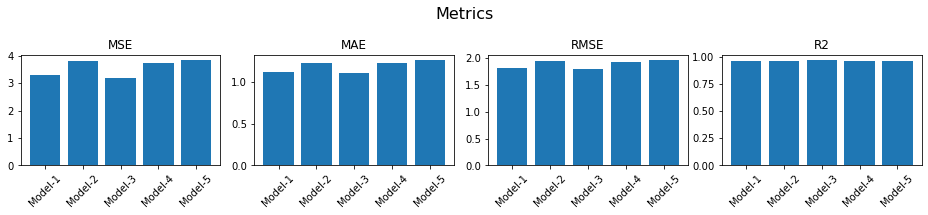

In [84]:
# bar plot of metrics
plot_metrics(df_metric_c)

In [85]:
# best model info
print_best_model(df_metric_c)

Best Model in terms of mse : Model-3
Best Model in terms of mae : Model-3
Best Model in terms of rmse: Model-3
Best Model in terms of r^2 : Model-3
Coefficients of best model: [ 3.43889852e-01 -6.89363752e-01  3.81713388e+00  2.91299726e+00
 -1.54113453e+01  5.84582542e-01 -6.91768812e-03  6.90806202e-01
 -9.98316563e-01 -8.13589511e+12 -7.96454512e-01 -1.47597678e+02
  4.43446085e-01  1.42996711e+02  3.70179501e-01 -2.06268370e+00
  1.23871360e+00 -1.54262516e-01 -1.69921895e+00 -7.23804215e+12
 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11
 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11  1.02037488e+11
  1.02037488e+11 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11
 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11  1.02037488e+11
 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11
 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11
  1.02037488e+11 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11
 -7.95815471e+11 -7.95815471e+11 -7.95815471

In [86]:
# models with country column has more r2 score
print(df_metric["R2"].sum() / df_metric.shape[0])
print(df_metric_c["R2"].sum() / df_metric_c.shape[0])

0.7232631248994508
0.9597224201624537


### Test Best Model

In [87]:
best_model_c = "X3"

In [88]:
# runs Linear Regression algorithm with model-3 to predict test data and see results
X = X3_w_country
y = clean_df["Life_Expectancy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=147)

scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lin_model_best_c = LinearRegression()
lin_model_best_c.fit(X_train, y_train)
y_pred = lin_model_best_c.predict(X_test)

MSE_b = mean_squared_error(y_test,y_pred)
MAE_b = mean_absolute_error(y_test,y_pred)
RMSE_b = np.sqrt(mean_squared_error(y_test,y_pred))
R2_b = r2_score(y_test,y_pred)
print("MSE : ", MSE_b)
print("MAE : ", MAE_b)
print("RMSE: ", RMSE_b)
print("R2  : ", R2_b)
print("coef: " ,lin_model_best_c.coef_)
print("intercept: ", lin_model_best_c.intercept_)

MSE :  3.20570153870291
MAE :  1.1083237025394477
RMSE:  1.79044730129175
R2  :  0.962863873454681
coef:  [ 3.43889852e-01 -6.89363752e-01  3.81713388e+00  2.91299726e+00
 -1.54113453e+01  5.84582542e-01 -6.91768812e-03  6.90806202e-01
 -9.98316563e-01 -8.13589511e+12 -7.96454512e-01 -1.47597678e+02
  4.43446085e-01  1.42996711e+02  3.70179501e-01 -2.06268370e+00
  1.23871360e+00 -1.54262516e-01 -1.69921895e+00 -7.23804215e+12
 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11
 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11  1.02037488e+11
  1.02037488e+11 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11
 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11  1.02037488e+11
 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11
 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11
  1.02037488e+11 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11
 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11
 -7.95815471e+11 -7.95815471e+11 -7.95815471e+11 

In [89]:
# function for best model
_str ="y = "
for i,m in enumerate(lin_model_best_c.coef_):
    _str += f"{X3_w_country.columns[i]} * {m} + "
_str += str(lin_model_best_c.intercept_)
print(_str)

y = Polio * 0.34388985161224345 + Population * -0.6893637519485267 + Year * 3.817133882409402 + Schooling * 2.9129972562272473 + HIV/AIDS * -15.411345349111308 + Diphtheria * 0.5845825422888797 + BMI * -0.006917688122985766 + Thinness_1-19years * 0.6908062018669732 + GDP * -0.9983165633610867 + Developed * -8135895107237.922 + Total_expenditure * -0.7964545117865063 + Under-five_Deaths * -147.59767841592227 + Thinness_5-9years * 0.4434460852583193 + Infant_Deaths * 142.99671100186194 + Income_composition_of_resources * 0.37017950061650495 + Measles * -2.06268370209871 + Percentage_Expenditure * 1.238713596451647 + Hepatitis_B * -0.15426251550227832 + Alcohol * -1.699218949910465 + Developing * -7238042147912.302 + Afghanistan * -795815471353.4214 + Albania * -795815471336.746 + Algeria * -795815471339.1973 + Angola * -795815471359.9751 + Antigua and Barbuda * -795815471335.8656 + Argentina * -795815471336.9962 + Armenia * -795815471338.5848 + Australia * 102037487995.20164 + Austria * 

In [90]:
# r2 of best model
f"R2: {R2_b}"

'R2: 0.962863873454681'